- 트라이(Trie)는 탐색 트리의 일종으로 키가 문자열인, 동적 배열 또는 연관 배열을 저장하는 데 사용되는 정렬된 트리 자료구조다.

In [1]:
## 트라이(Trie)는 실무에 매우 유용하게 쓰이는 자료구조로서, 
## 특히 자연어 처리(NLP) 분야에서 문자열 탐색을 위한 자료구조로 널리 쓰인다.

## 트라이는 1959년에 처음 공개되었으며, 검색을 뜻하는 'retrieval'의 중간 음절에서 용어를 따왔다.
## 트라이는 트리와 유사하지만, 지금까지 우리가 주로 살펴본 이진 트리의 모습이 아닌 전형적인 다진 트리(m-ary Tree)의 형태를 띤다.

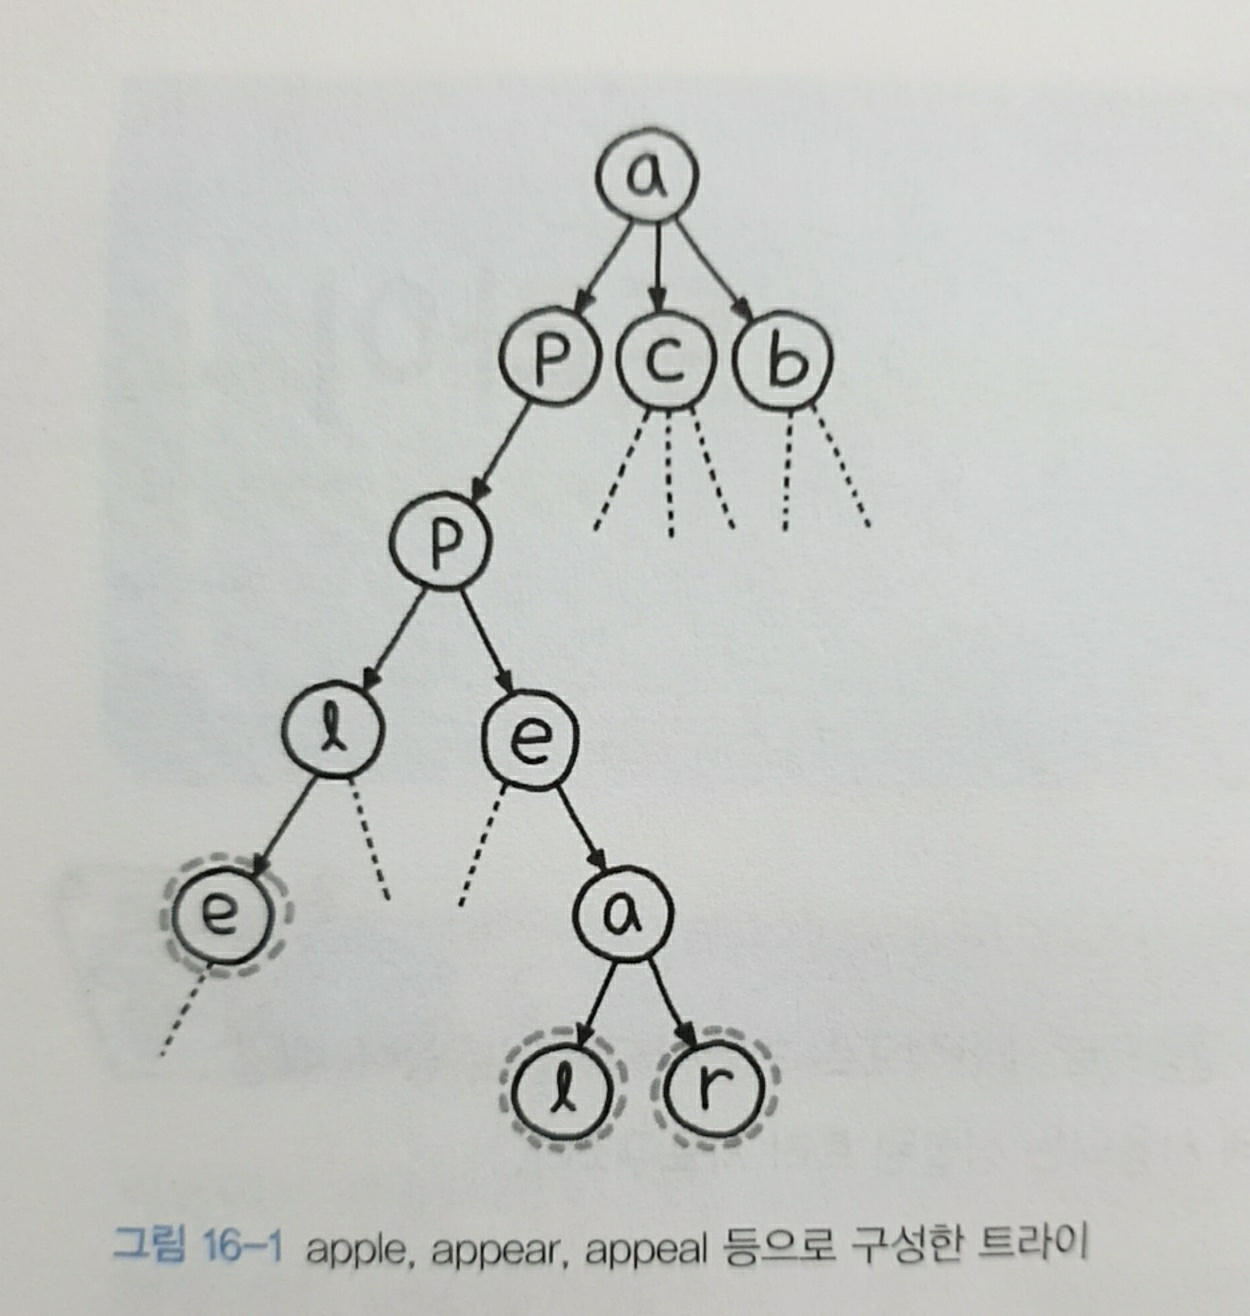

In [2]:
from IPython.display import Image

Image('그림16-1.jpg', width="270")

In [3]:
## 트라이는 각각의 문자 단위로 index를 구축한 것과 유사하다.
## 그림 16-1은 apple, appear, appeal 등으로 트라이를 구성한 것이다.
## 그림에서 apple을 찾는다고 할 때, 수백 개의 문자가 있다고 해도
## 트라이 탐색을 하면 단 다섯 번 만에 apple 문자열의 존재 여부를 파악할 수 있다.

## apple을 찾을 때, a -> p -> p 순으로 문자별 일치하는 노드를 찾아 내려가면 된다.
## 이처럼 트라이에서는 각 문자열의 길이만큼 탐색하면 원하는 결과를 찾을 수 있다.

## 트라이는 문자열을 위한 트리이기 때문에 사실상 문자 개수만큼 자식이 있어 
## 상당히 많은 자식 노드를 갖고 있는 트리임을 확인할 수 있다.

# 56. 트라이 구현

### LeetCode 208. Implement Trie (Prefix Tree)

##### 트라이의 insert, search, startsWith 메서드를 구현하라.

Trie trie = new Trie()

trie.insert("apple");<br/>
trie.search("apple");        // returns true<br/>
trie.search("app");          // returns false<br/>
trie.startsWith("app");      // returns true<br/>
trie.insert("app");<br/>
trie.search("app");          // returns true<br/>

##### 풀이 1 딕셔너리를 이용해 간결한 트라이 구현

In [4]:
## 트라이를 직접 구현해보는 문제다.
## 여기서는 딕셔너리를 이용해 가급적 간결한 형태로 풀이해본다.

In [5]:
## 먼저 트라이를 저장할 노드는 별도 클래스로 선언한다.

```python
class TrieNode:
    def __init__(self):
        self.word = False
        self.children = {}
```     

In [6]:
## 다음으로, 트라이 연산을 구현할 별도 클래스를 선언하고 삽입 메소드를 구현한다.

```python
class Trie:
    def __init__(self):
        self.root = TrieNode()
        
    def insert(self, word: str) -> None:
        node = self.root
        for char in word:
            if char not in node.children:
                node.children[char] = TrieNode()
            node = node.children[char]
        node.word = True
```        

In [7]:
## 처음 Trie 클래스를 생성하게 되면 루트 노드로 별도 선언한 TrieNode 클래스를 갖게 되고,
## 삽입 시 루트부터 자식 노드가 점점 깊어지면서 문자 단위의 다진 트리(m-ary Tree) 형태가 된다.
## 만약 입력값이 apple인 경우, 삽입 코드는 다음과 같다.

## >>> t = Trie()
## >>> t.insert("apple")

## 이 경우 트라이는 그림 16-2와 같은 형태가 된다.

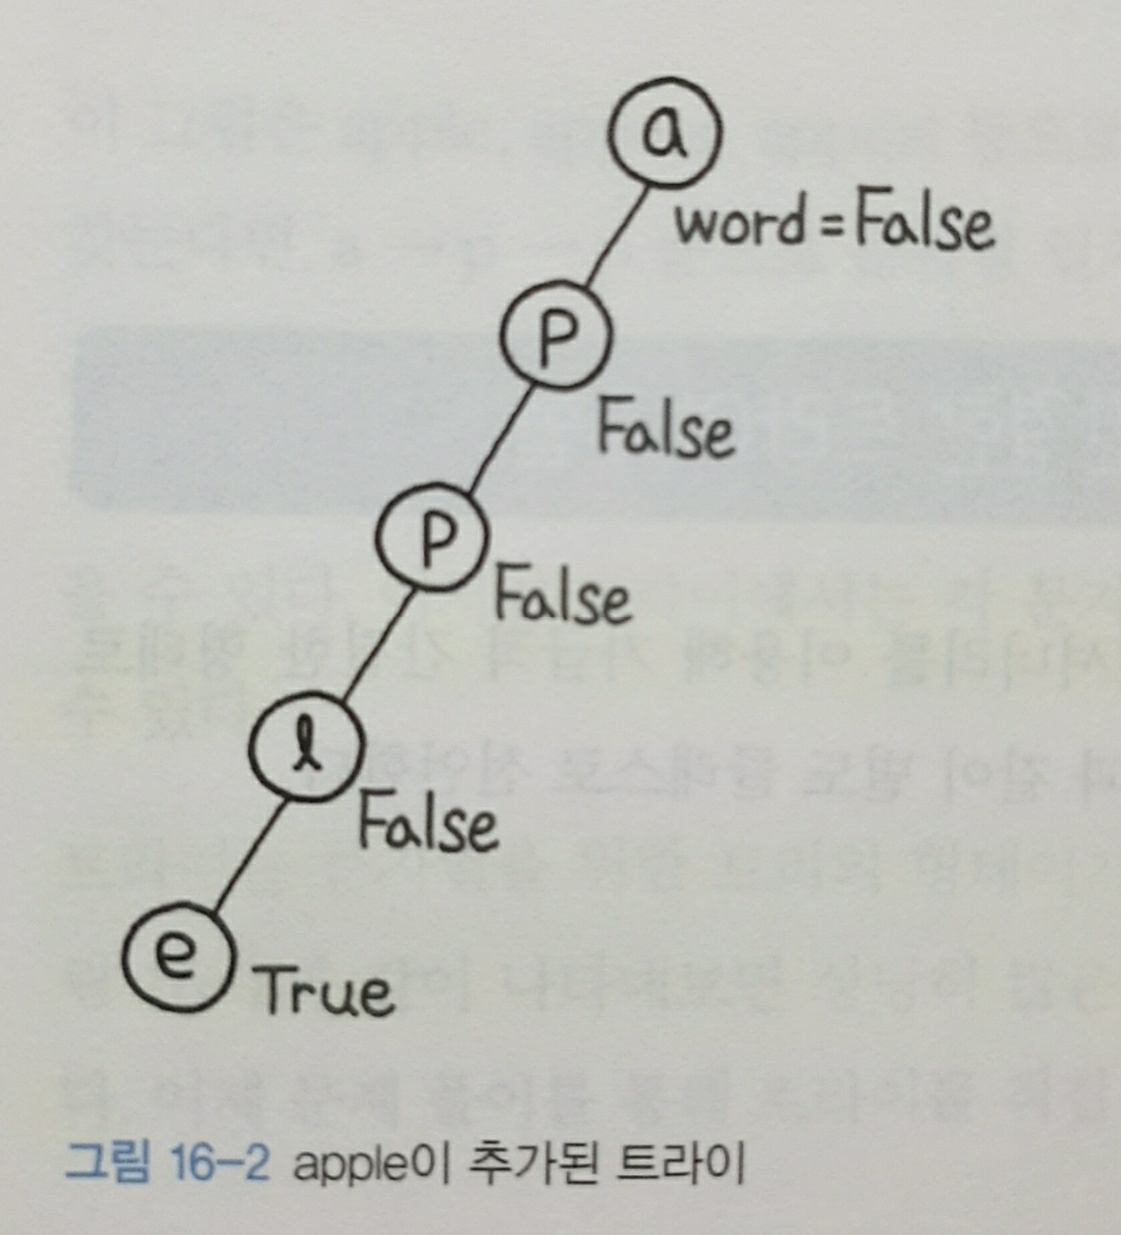

In [8]:
from IPython.display import Image

Image('그림16-2.jpg', width="250")

In [9]:
## 각각의 노드는 word 값을 갖는다. 이 값은 단어가 모두 완성되었을 때만 True가 된다.
## apple 외에 appear, appeal 같은 문자가 추가로 삽입된다면 그림 16-3과 같은 형태가 된다.

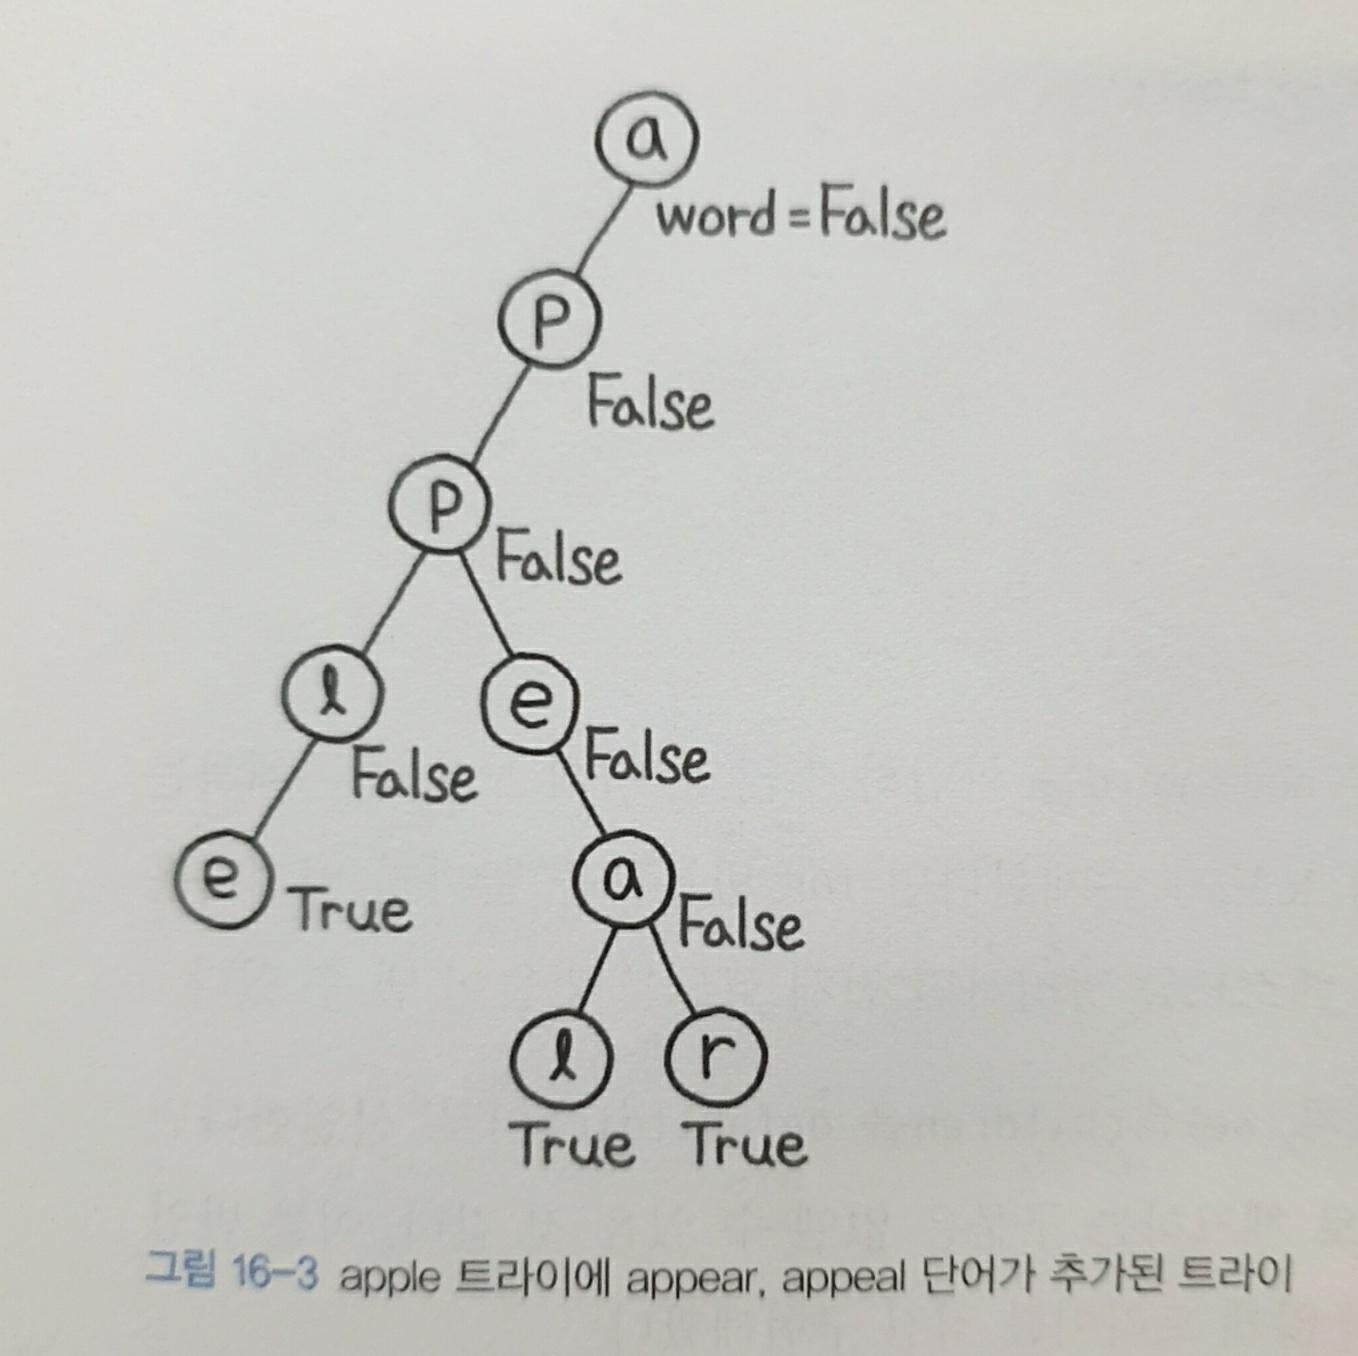

In [10]:
from IPython.display import Image

Image('그림16-3.jpg', width="300")

In [11]:
## 이 그림에서 같은 문자가 같은 자식을 타고 내려가다가 달라지는 문자부터 서로 다른 노드로 분기된다.
## 마지막에는 appeal과 appear가 완성되는 l과 r 노드가 각각 True로 셋팅된다.

In [12]:
## 이제 이 값이 존재하는지 확인하는 메서드인 search()와 startsWith()를 구현한다.
## search()는 단어가 존재하는지 여부를 판별하는 것이고, startsWith()는 해당 문자열로 시작하는 단어가 존재하는지 판별한다.
## 즉 둘다 동일하게 문자 단위로 계속 깊이 탐색을 하고 search()의 경우에 맨 마지막에 word가 True인지 확인하면 될 것이다.

In [13]:
## 먼저 search()의 코드는 다음과 같다.

```python
def search(self, word: str) -> bool:
    node = self.root
    for char in word:
        if char not in node.children:
            return False
        node = node.children[char]
    return node.word
```

In [14]:
## 문자열에서 문자를 하나씩 for 문으로 순회하면서 자식 노드로 계속 타고 내려간다.
## 그리고 마지막에 node.word 여부를 리턴한다.

In [15]:
## startsWith()는 다음과 같다.

```python
def startsWith(self, prefix: str) -> bool:
    node = self.root
    for char in prefix:
        if char not in node.children:
            return False
        node = node.children[char]
    return True
```

In [16]:
## search()와 거의 동일하다. 차이점은 node.word를 확인하지 않고, 자식 노드가 존재하는지 여부만 판별한다는 점이다.

## 전체 코드는 다음과 같다.
## self.children을 defaultdict()로 선언하면 insert() 삽입 메서드에서 매번 if로 체크하는 구문을 없앨 수 있다.

In [17]:
import collections

class TrieNode:
    def __init__(self):
        self.word = False
        self.children = collections.defaultdict(TrieNode)
        
class Trie:
    def __init__(self):
        self.root = TrieNode()
        
    def insert(self, word: str) -> None:
        node = self.root
        for char in word:
            node = node.children[char]
        node.word = True
        
    def search(self, word: str) -> bool:
        node = self.root
        for char in word:
            if char not in node.children:
                return False
            node = node.children[char]
        return node.word
    
    def startsWith(self, prefix: str) -> bool:
        node = self.root
        for char in prefix:
            if char not in node.children:
                return False
            node = node.children[char]
        return True

# 57. 팰린드롬 페어

### LeetCode 336. Palindrome Pairs

##### 단어 리스트에서 words[i] + words[j] 가 팰린드롬이 되는 모든 인덱스 조합 (i, j)를 구하라

In [18]:
## 예제 1
    ## input: ["abcd", "dcba", "lls", "s", "sssll"]
    ## output: [[0, 1], [1, 0], [3, 2], [2, 4]]
    ## 설명: ["dcbaabcd", "abcddcba", "slls", "llssssll"]이 팰린드롬이다.

    
## 예제 2
    ## input: ["bat", "tab", "cat"]
    ## output: [[0, 1], [1, 0]]
    ## 설명: ["battab", "tabbat"]이 팰린드롬이다.


##### 풀이 1 팰린드롬을 브루트 포스로 계산

In [19]:
## 먼저 브루트 포스 풀이부터 진행해보자.
## 각각의 모든 조합을 구성해보고 이 구성이 팰린드롬인지 여부를 판별하면, O(n^2) 시간 복잡도로 풀이가 가능할 것 같다.

## 먼저 팰린드롬 여부를 체크하는 함수는 6장의 1번 '유효한 팰린드롬' 문제에서 풀어본 풀이 중 가장 간단한 코드를 택해보자
## 슬라이싱 풀이인데, 당시 풀이를 보면 알겠지만 가장 간단할 뿐만 아니라 성능 또한 매우 좋았다.

```python
def is_palindrome(word):
    return word == word[::-1]
```

In [20]:
## 이제 n^2번 반복하면서 모든 조합을 구성하고, 매번 팰린드롬 여부인지 체크한다.

In [21]:
from typing import *

def palindromePairs(words: List[str]) -> List[List[int]]:
    def is_palindrome(word):
        return word == word[::-1]

    output = []
    for i, word1 in enumerate(words):
        for j, word2 in enumerate(words):
            if i == j:
                continue
            if is_palindrome(word1 + word2):
                output.append([i, j])

    return output

In [22]:
words = ["abcd", "dcba", "lls", "s", "sssll"]

palindromePairs(words)

[[0, 1], [1, 0], [2, 4], [3, 2]]

In [23]:
## 간단하게 구현했고 실행도 잘 된다. 그러나 리트코드에서는 타임아웃이 발생하며 통과할 수 없다.
## 이런 형태의 브루트 포스로는 시간 초과로 풀리지 않는다. 
## 좀 더 효율적인 풀이가 필요하다.

##### 풀이 2 트라이 구현

In [24]:
## O(n^2)을 O(n)으로 풀이할 수 있는 방법이 있을까?
## 앞서 구현해본 트라이로 풀이를 진행해보자.

In [25]:
## 먼저 이전 문제에서 풀이했던 트라이 구현을 그대로 가져와본다.

```python
import collections

class TrieNode:
    def __init__(self):
        self.word = False
        self.children = collections.defaultdict(TrieNode)
        
class Trie:
    def __init__(self):
        self.root = TrieNode()
        
    def insert(self, word: str) -> None:
        node = self.root
        for char in word:
            node = node.children[char]
        node.word = True
        
    def search(self, word: str) -> bool:
        node = self.root
        for char in word:
            if char not in node.children:
                return False
            node = node.children[char]
        return node.word
``` 

In [26]:
## 시작 단어 존재 여부 판별 메서드를 제외한 모든 구현을 가져와봤다.
## 이 트라이 구현을 그대로 활용할 것이다. 그렇다면 어떻게 풀어야 할까?

## O(n)으로 풀기 위해서는, 모든 입력값을 트라이로 만들어두고 딱 한 번씩만 탐색하는 문제로 변형할 것이다.
## 팰린드롬을 판별해야 하므로 뒤집어서 트라이로 구성하면 해법을 찾을 수 있을 것 같다.

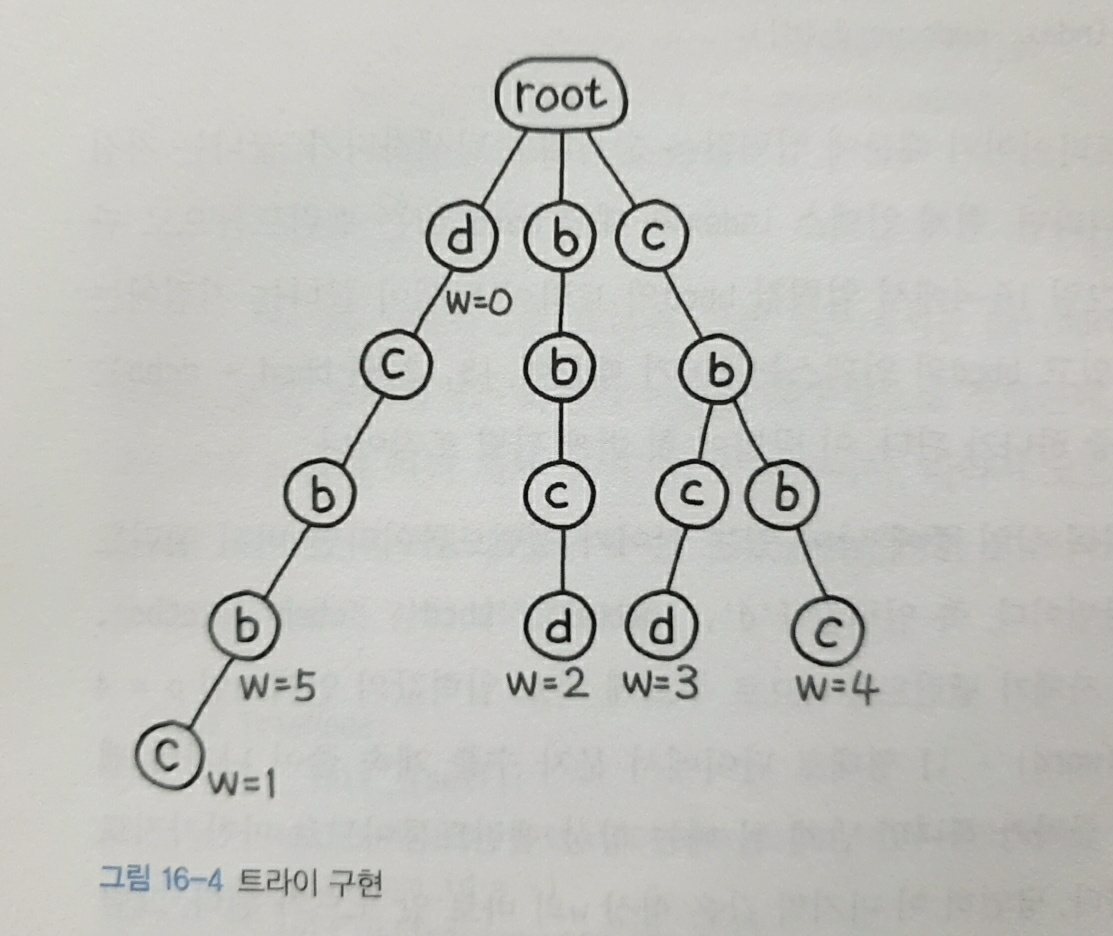

In [27]:
from IPython.display import Image

Image('그림16-4.jpg', width="300")

In [28]:
## 입력값이 ['d', 'cbbcd', 'dcbb', 'dcbc', 'cbbc', 'bbcd'] 일 때,
## 입력값을 뒤집으면 ['d', 'dcbbc', 'bbcd', 'cbcd', 'cbbc', 'dcbb']가 되고 이 값의 트라이를 구축한 결과는 위 그림과 같다.

In [29]:
## 입력값을 뒤집은 다음 문자 단위로 계속 내려가면서 트라이를 구현하고,
## 각각의 단어가 끝나는 지점에는 단어 인덱스를 word_id로 부여했다.
## 이전 문제에서는 True, False 여부만 표기했지만, 여기서는 해당 단어의 인덱스를 찾아야 하기 때문에 word_id로 부여했다.
## 코드에서는 word_id이고, 그림에서는 w로 표시했다.

```python
def insert(self, index: int, word: str) -> None:
    node = self.root
    for i, char in enumerate(reversed(word)):
        ...
        node = node.children[char]
    node.word = True
```    

In [30]:
## 이제 단어 존재 여부를 찾는 함수의 핵심 코드는 다음과 같다.

```python
result = []
...
while word:
    if node.word_id >= 0:
        ...
        result.append([index, node.word_id])
```

In [31]:
## 단어를 뒤집어서 구축한 트라이이기 때문에 입력값은 순서대로 탐색하다가, 끝나는 지점의 word_id 값이 -1이 아니라면,
## 현재 인덱스 index와 해당 word_id는 팰린드롬으로 판단할 수 있다.

## 예를 들어 그림 16-4에서 입력값이 bbcd의 트라이 탐색이 끝나는 지점에는 word_id = 2가 셋팅되어 있고,
## bbcd의 index는 5이기 때문에 [5, 2]인 bbcd + dcbb는 팰린드롬이며, 이는 정답 중 하나가 된다.
## 이 방법이 첫 번째 판별 로직이다.

In [32]:
## 두 번째 판별 로직은 트라이 삽입 중에 남아 있는 단어가 팰린드롬이라면 미리 팰린드롬 여부를 세팅해 두는 방법이다.
## 즉, 입력값 cbbc는 단어 자체가 팰린드롬이므로 루트에 바로 입력값의 인덱스인 p = 4를 세팅하고,
## word[0:len(word) - i] 형태로 단어에서 문자 수를 계속 줄여 나가며 팰린드롬 여부를 체크한다.
## 문자가 하나만 남게 될 때는 항상 팰린드롬이므로 마찬가지로 p = 4를 마지막에 세팅한다.
## 당연히 이 마지막 값은 항상 w의 바로 앞 노드가 된다.

## 그림 16-4에 이 알고리즘을 추가로 구현하여 트라이에 표현해보자.
## 그림 16-5는 이와 같이 팰린드롬 여부인 p를 추가한 트라이다.

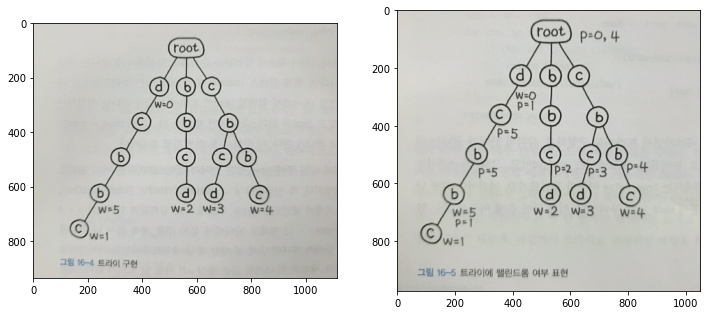

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
columns = 4
images = ["그림16-4.jpg", "그림16-5.jpg"]
for i, path in enumerate(images):
    image = plt.imread(path)
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

In [34]:
## 이제 이 알고리즘을 추가하여 삽입 함수를 다음과 같이 개선해보자

```python
def insert(self, index: int, word: str) -> None:
    node = self.root
    for i, char in enumerate(reversed(word)):
        if self.is_palindrome(word[0:len(word) - i]):
            node.palindrome_word_ids.append(index)
        node = node.children[char]
    node.word_id = index
```

In [35]:
## 참고로 그림 16-5에서 p로 표현한 것을 코드에서는 palindrome_word_ids로 풀어서 표현했다.
## 코드에서 palindrome_word_ids는 리스트이며 복수형이다.

## 이제 이 로직들을 반영할 각 트라이 노드가 저장될 TrieNode 클래스를 다음과 같이 수정해보자

```python
class TrieNode:
    def __init__(self):
        self.children = collections.defaultdict(TrieNode)
        self.word_id = -1
        self.palindrome_word_ids = []
```       

In [36]:
## 이제 남아 있는 단어가 팰린드롬인 경우를 좀 더 살펴보자.
## 그림 16-5에서 w는 단어의 끝이고 p는 w이전 노드에 반드시 셋팅이 된다.
## 문자가 하나만 남았을 때는 항상 팰린드롬이기 때문이라고 언급한 바 있다.
## 다시 한번 입력값 ['d', 'cbbcd', 'dcbb', 'dcbc', 'cbbc', 'bbcd']에서 dcbb의 인덱스는 2이고, 
## 트라이에서는 d->c->b->b의 마지막 노드가 p = 1이다. 
## 그렇다면 [2, 1]은 정답 중 하나가 된다. 
## 실제로 인덱스 1은 cbbcd이므로 dcbb + cbbcd는 팰린드롬으로, 정답 중 하나다.

## 또 다른 경우로, 인덱스 0의 d를 살펴보자
## 그림 16-5에서 d 노드는 p = 1이다. 즉 [0, 1]도 정답이 된다.
## d + cbbcd이며 마찬가지로 팰린드롬이다. 이 부분을 판별하는 코드는 다음과 같다.

```python
for palindrome_word_id in palindrome_word_ids:
    result.append([index, palindrome_word_id])
```

In [37]:
## 마지막 세 번째 판별 로직은 입력값을 문자 단위로 확인해 나가다가 해당 노드의 word_id가 -1이 아닐 때,
## 나머지 문자가 팰린드롬이라면 팰린드롬으로 판별하는 경우다.
## dcbc + d가 이에 해당하는데, 입력값 dcbc는 먼저 d부터 탐색하다가 d의 word_id가 -1이 아니기 때문에 
## 나머지 문자 cbc에 대한 팰린드롬 여부를 검사한다.여기서는 dcbc + d를 팰린드롬으로 판별한다.
## 그리고 다음과 같은 판별 로직을 코드에 추가한다.

```python
while word:
    if node.word_id >= 0:
        if self.is_palindrome(word):
            result.append([index, node.word_id])
        ...
    node = node.children[word[0]]
    word = word[1:]
        
```

In [38]:
## 다소 복잡해 보이지만 3가지 판별 로직을 다시 정리하면 다음과 같다.

        1. 끝까지 탐색했을 때 word_id가 있는 경우(그림 16-5에서는 w, 전체 코드에서는 (1))<br/>
        
        2. 끝까지 탐색했을 때 palindrome_word_ids가 있는 경우(그림 16-5에서는 p, 전체 코드에서는 (2))<br/>
        
        3. 탐색 중간에 word_id가 있고(그림 16-5에서는 w) 나머지 문자가 팰린드롬인 경우(전체코드에서는 (3))

In [39]:
## 이렇게 3가지 경우를 팰린드롬으로 판별할 수 있으며,
## 입력값을 각각 한 번씩만 대입하면 되기 때문에 O(n)으로 풀이할 수 있다.

In [40]:
## 전체 코드는 다음과 같다.

In [41]:
# 트라이를 저장할 노드
class TrieNode:
    def __init__(self):
        self.children = collections.defaultdict(TrieNode)
        self.word_id = -1
        self.palindrome_word_ids = []
        
class Trie:
    def __init__(self):
        self.root = TrieNode()
        
    @staticmethod
    def is_palindrome(word: str) -> bool:
        return word[::] == word[::-1]
    
    # 단어 삽입
    def insert(self, index, word) -> None:
        node = self.root
        for i, char in enumerate(reversed(word)):
            if self.is_palindrome(word[0:len(word) - i]):
                node.palindrome_word_ids.append(index)
            node = node.children[char]
            node.val = char
        node.word_id = index
    
    def search(self, index, word) -> List[List[int]]:
        result = []
        node = self.root
        
        while word:
            # 판별 로직  (3)
            if node.word_id >= 0:
                if self.is_palindrome(word):
                    result.append([index, node.word_id])
            if not word[0] in node.children:
                return result
            node = node.children[word[0]]
            word = word[1:]
            
        # 판별 로직  (1)
        if node.word_id >= 0 and node.word_id != index:
            result.append([index, node.word_id])
            
        # 판별 로직  (2)
        for palindrome_word_id in node.palindrome_word_ids:
            result.append([index, palindrome_word_id])
            
        return result
        
        
class Solution:
    def palindromePairs(self, words: List[str]) -> List[List[int]]:
        trie = Trie()
        
        for i, word in enumerate(words):
            trie.insert(i, word)
            
        results = []
        for i, word in enumerate(words):
            results.extend(trie.search(i, word))
            
        return results

In [42]:
words = ['d', 'cbbcd', 'dcbb', 'dcbc', 'cbbc', 'bbcd']

ans = Solution()

ans.palindromePairs(words)

[[0, 1], [1, 4], [2, 5], [2, 1], [3, 0], [5, 2]]

In [43]:
## 이 문제는 트라이와 같은 효율적인 자료구조로 접근해야 풀 수 있는 상당히 어려운 문제인 반면,
## 트라이의 장점을 십분 발휘할 수 있는 매우 좋은 문제이기도 하다.

In [44]:
## **** 문법 ****

    ## @staticmethod 데코레이터
    
        ## 앞서 풀이에서 메서드 위에 @staticmethod가 쓰인 것이 눈에 띨 것이다.
        ## 파이썬에서는 이 부분을 데코레이터(Decorator)라 부른다.
        ## 이렇게 정의한 메서드는 클래스와 독립적으로 함수로서의 의미를 강하게 갖는다.
        ## 실제로 파라미터에도 클래스 메서드에는 항상 따라붙는 self가 빠져 있고, 
        ## 함수 자체가 별도의 자료형으로 선언되어 있다.

In [45]:
class CLASS:
    def a(self):
        pass
    
    @staticmethod
    def b():
        pass

In [46]:
        ## 이 같은 클래스가 선언되어 있을 때, 함수 a()와 b()의 타입을 출력해보자

In [47]:
type(CLASS.a), type(CLASS.b)

(function, function)

In [48]:
        ## 클래스를 생성하지 않고 바깥에서 직접 호출했을 때 타입은 이처럼 둘 다 함수(Function)가 된다.

In [49]:
cls = CLASS()
type(cls.a), type(cls.b)

(method, function)

In [50]:
        ## 그러나 클래스를 생성한 후에 함수에 대한 타입을 확인해보면, 
        ## 클래스 내 함수는 이제 메서드(method)가 된다.
        ## 그러나 @staticmethode로 선언한 함수는 여전히 함수임을 확인할 수 있다.
        ## 클래스의 메서드가 아니라 여전히 독립된 함수의 의미를 갖는 것이다.
        
        ## 사실상 클래스 바깥에 함수를 별도로 선언한 것과 같은 의미를 지닌다.
        ## 이렇게 하면 클래스 메서드처럼 자유롭게 클래스 인스턴스에 접근하는 것이 제한된다.
        ## 따라서 클래스 인스턴스에 접근을 제한하고 분명하게 독립적인 함수로 선언하고자 할 경우 종종 사용된다.
        
        ## ** 클래스와 관련된 외부 함수를 묶어서 표현하려는 의도?